## Homework 2, Bahadır Erdem, 21070001048

A variation of the residual block called a bottleneck residual block uses 1x1 convolutions to produce a bottleneck. The number of parameters and matrix multiplications is decreased when a bottleneck is used. The goal is to reduce the number of factors and boost depth by making residual blocks as thin as possible. They are employed in deeper ResNets like ResNet-50 and ResNet-101 and were first included in the ResNet architecture.

Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2) while original implementation places the stride at the first 1x1 convolution(self.conv1) according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.

The bottleneck residual block consists of three convolutional layers:

1. **1x1 Convolution (Reduce dimension)**
2. **3x3 Convolution (Process)**
3. **1x1 Convolution (Restore dimension)**

These layers are followed by batch normalization and ReLU activations. Additionally, a shortcut connection (residual connection) adds the input to the output of these layers, allowing the network to learn residual functions. Let's break down each component:

1. **1x1 Convolution (Reduce Dimension)**
   - **Input**: \( x \)
   - **Convolution**: 1x1 convolution to reduce the number of channels to a smaller number (let’s call this \( d \)).
   - **Batch Normalization**: Normalizes the output of the convolution.
   - **ReLU Activation**: Applies the ReLU activation function.

2. **3x3 Convolution (Process)**
   - **Input**: Output from the previous step.
   - **Convolution**: 3x3 convolution to process the reduced dimension.
   - **Batch Normalization**: Normalizes the output of the convolution.
   - **ReLU Activation**: Applies the ReLU activation function.

3. **1x1 Convolution (Restore Dimension)**
   - **Input**: Output from the previous step.
   - **Convolution**: 1x1 convolution to restore the original dimension (number of channels).
   - **Batch Normalization**: Normalizes the output of the convolution.

4. **Residual Connection**
   - The original input \( x \) is added to the output of the final batch normalization.
   - **Addition**: \( \text{Output} = \text{BatchNorm}_3 + x \)

5. **ReLU Activation**
   - Applies the ReLU activation function to the final output.



Source: https://doi.org/10.48550/arXiv.1512.03385

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import models, transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load and prepare the dataset
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trn_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
vld_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
tst_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the training set into training and validation partitions
trn_size = int(0.8 * len(trn_dataset))
vld_size = len(trn_dataset) - trn_size
torch.manual_seed(0)
trn_dataset, vld_dataset = random_split(trn_dataset, [trn_size, vld_size])

classes = 'Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
num_classes = len(classes)

batch_size = 128
trn_loader = DataLoader(trn_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
vld_loader = DataLoader(vld_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
tst_loader = DataLoader(tst_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

def visualize_model_predictions2(model, loader=tst_loader, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: ' + classes[preds[j]])
                plt.imshow(inputs.cpu().data[j])
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return model.train(mode=was_training)




Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# Below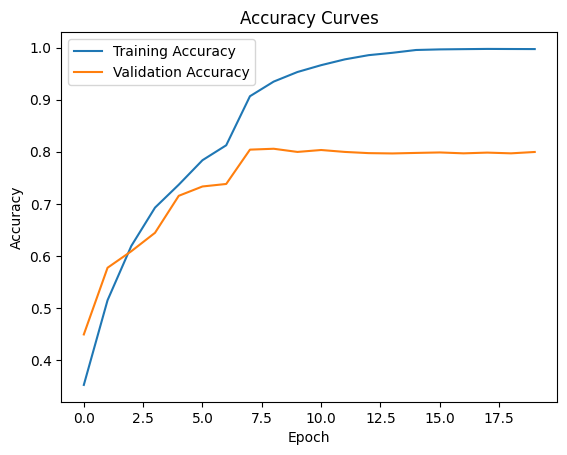 is a rewritten version of visualise

In [9]:
def visualize_model_predictions(model, loader=tst_loader, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {classes[preds[j]]}')
                img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
                img = np.clip(img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)
                plt.imshow(img)
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
    model.train(mode=was_training)


# This below is an example code for bottleneck
I do not run this and it si purely for example purposes

In [ ]:
#Original Resnet Bottleneck
#For context. Taken from the resnet github.

#NOT MY CODE


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

#DO NOT RUN

# Bottleneck Residual Block According to the specifications

In [10]:
#Bottleneck Resudial Block

class BottleneckResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BottleneckResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels * 4, kernel_size=1, stride=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * 4)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels * 4:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * 4, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * 4)
            )

    def forward(self, x):
        residual = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        out += residual
        out = self.relu(out)

        return out


In [11]:
class ResNetBottleneck(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNetBottleneck, self).__init__()
        self.in_channels = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 16, layers[0])
        self.layer2 = self._make_layer(block, 32, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128 * 4, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * 4
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def resnet50(num_classes=10):
    return ResNetBottleneck(BottleneckResidualBlock, [3, 4, 6, 3], num_classes=num_classes)

# Training the model for the first time here

In [16]:
# Hyperparameters
batch_size = 128
epochs = 20
learning_rate = 0.01
momentum = 0.9
weight_decay = 1e-4 #I am not using this here with SGD but included it because it would be similiar looking for the adam with decay

# Model, loss function, and optimizer
model = resnet50(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Dataloaders
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

torch.manual_seed(0)
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Training loop
train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # L2 regularization term
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += weight_decay * l2_reg

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader.dataset))
    train_acc.append(correct / total)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # L2 regularization term for validation (if needed)
            l2_reg = 0
            for param in model.parameters():
                l2_reg += torch.norm(param, 2)
            loss += weight_decay * l2_reg

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader.dataset))
    val_acc.append(correct / total)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}')

# Plot learning and generalization curves
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Learning and Generalization Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # L2 regularization term for test (if needed)
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += weight_decay * l2_reg

        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_acc = correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Visualize model predictions
visualize_model_predictions(model, test_loader)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Train Loss: 1.8294, Train Acc: 0.3491, Val Loss: 1.6795, Val Acc: 0.4255
Epoch 2/20, Train Loss: 1.4090, Train Acc: 0.5189, Val Loss: 1.4585, Val Acc: 0.5098
Epoch 3/20, Train Loss: 1.1367, Train Acc: 0.6234, Val Loss: 1.2238, Val Acc: 0.6053
Epoch 4/20, Train Loss: 0.9378, Train Acc: 0.7003, Val Loss: 1.0962, Val Acc: 0.6555
Epoch 5/20, Train Loss: 0.7712, Train Acc: 0.7571, Val Loss: 0.8881, Val Acc: 0.7244
Epoch 6/20, Train Loss: 0.6541, Train Acc: 0.8024, Val Loss: 0.9876, Val Acc: 0.7200
Epoch 7/20, Train Loss: 0.5532, Train Acc: 0.8363, Val Loss: 0.8747, Val Acc: 0.7368
Epoch 8/20, Train Loss: 0.3259, Train Acc: 0.9252, Val Loss: 0.7121, Val Acc: 0.7940
Epoch 9/20, Train Loss: 0.2502, Train Acc: 0.9531, Val Loss: 0.7259, Val Acc: 0.7949
Epoch 10/20, Train Loss: 0.2113, Train Acc: 0.9680, Val Loss: 0.7503, Val Acc: 0.7920
Epoch 11/20, Train Loss: 0.1797, Train Acc: 0.9790, Val Loss: 0.7754, Val

KeyboardInterrupt: 

#My observations are under the loss and accuracy data.
I could not figure how to add pictures to collab without putting them to the drive so I will add it later.
## After waiting for 44 minutes and 40 seconds the output is this:

Epoch 1/20, Train Loss: 1.8294, Train Acc: 0.3491, Val Loss: 1.6795, Val Acc: 0.4255

Epoch 2/20, Train Loss: 1.4090, Train Acc: 0.5189, Val Loss: 1.4585, Val Acc: 0.5098

Epoch 3/20, Train Loss: 1.1367, Train Acc: 0.6234, Val Loss: 1.2238, Val Acc: 0.6053

Epoch 4/20, Train Loss: 0.9378, Train Acc: 0.7003, Val Loss: 1.0962, Val Acc: 0.6555

Epoch 5/20, Train Loss: 0.7712, Train Acc: 0.7571, Val Loss: 0.8881, Val Acc: 0.7244

Epoch 6/20, Train Loss: 0.6541, Train Acc: 0.8024, Val Loss: 0.9876, Val Acc: 0.7200

Epoch 7/20, Train Loss: 0.5532, Train Acc: 0.8363, Val Loss: 0.8747, Val Acc: 0.7368

Epoch 8/20, Train Loss: 0.3259, Train Acc: 0.9252, Val Loss: 0.7121, Val Acc: 0.7940

Epoch 9/20, Train Loss: 0.2502, Train Acc: 0.9531, Val Loss: 0.7259, Val Acc: 0.7949

Epoch 10/20, Train Loss: 0.2113, Train Acc: 0.9680, Val Loss: 0.7503, Val Acc: 0.7920

Epoch 11/20, Train Loss: 0.1797, Train Acc: 0.9790, Val Loss: 0.7754, Val Acc: 0.7906

Epoch 12/20, Train Loss: 0.1565, Train Acc: 0.9878, Val Loss: 0.8036, Val Acc: 0.7877

Epoch 13/20, Train Loss: 0.1394, Train Acc: 0.9925, Val Loss: 0.8176, Val Acc: 0.7874

Epoch 14/20, Train Loss: 0.1271, Train Acc: 0.9960, Val Loss: 0.8480, Val Acc: 0.7887

# My observations:

I think there is a obvious overfitting starting about epoch 9 or 10 and it just stalls from there. Adding more regularization or augmentation would help it to achieve its full potential. Your results may varry because it is taking a lot of time and I just test and play with a smaller model to test things out. (Please forgive my poor writing I am very sleepy at the moment)

# Different training dynamics.
I am starting to the different training dynamics section.

First ADAM with weight decay.

I read this paper (briefly) to understand the differences between adam and sgd
https://arxiv.org/pdf/2108.11371

Which was pretty complicated and I don't think I understood.

But my basic interpretation is as follows:
Adam is an optimization algorithm that computes adaptive learning rates for each parameter. It combines the benefits of two other popular optimization methods: AdaGrad and RMSProp.

Adam keeps an exponentially decaying average of past gradients and past squared gradients.


In [ ]:
# Hyperparameters
batch_size = 128
epochs = 20
learning_rate = 0.001  # Lower learning rate for Adam
weight_decay = 1e-4

# Model, loss function, and optimizer
model = resnet50(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Dataloaders
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

torch.manual_seed(0)
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Training loop
train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader.dataset))
    train_acc.append(correct / total)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader.dataset))
    val_acc.append(correct / total)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}')

# Plot learning and generalization curves
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Learning and Generalization Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_acc = correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Visualize model predictions
visualize_model_predictions(model, test_loader)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Train Loss: 1.5569, Train Acc: 0.4222, Val Loss: 1.6098, Val Acc: 0.4658
Epoch 2/20, Train Loss: 1.1072, Train Acc: 0.6028, Val Loss: 1.0918, Val Acc: 0.6052
Epoch 3/20, Train Loss: 0.8616, Train Acc: 0.6967, Val Loss: 1.0599, Val Acc: 0.6531
Epoch 4/20, Train Loss: 0.6970, Train Acc: 0.7580, Val Loss: 0.7928, Val Acc: 0.7184
Epoch 5/20, Train Loss: 0.5936, Train Acc: 0.7920, Val Loss: 0.8748, Val Acc: 0.6997


# Learning rate scheduling

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 128
epochs = 20
learning_rate = 0.001
weight_decay = 1e-4

# Model, loss function, and optimizer
model = resnet50(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Dataloaders
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

torch.manual_seed(0)
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)

# Training loop
train_losses = []
val_losses = []
train_acc = []
val_acc = []
learning_rates = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader.dataset))
    train_acc.append(correct / total)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader.dataset))
    val_acc.append(correct / total)

    # Step the scheduler
    scheduler.step(val_acc[-1])

    # Track the current learning rate
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}, LR: {current_lr:.6f}')

# Plot learning and generalization curves
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Learning and Generalization Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot learning rate evolution
plt.figure()
plt.plot(learning_rates, label='Learning Rate')
plt.legend()
plt.title('Learning Rate Evolution')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# Evaluate on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_acc = correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Visualize model predictions
visualize_model_predictions(model, test_loader)
